In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/umasreeram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/umasreeram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

__Creating functions to clean tweets__

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer




def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    return " ".join(stems)
    lemmas = lemmatize_verbs(stems)
    return " ".join(lemmas)




def clean_string(mystr):
    mystr=mystr.lower()
    mystr=re.sub(r"\\\w+", " ", mystr)
    mystr=re.sub(r"\@\w+"," ",mystr)
    mystr=re.sub(r"\#\w+"," ",mystr)
    mystr=re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"," ",mystr)
    
    mystr=mystr[2:-1]
    
    cleantext = "".join([x.lower() if (x.isalpha() or x.isspace()) else ' ' for x in mystr])
    
    return cleantext

def remove_stop_words(mystr):
    word_list= mystr.split()
    cleaned_word_list=[w for w in word_list if w not in stop_words and len(w)>=2]
    
    return cleaned_word_list
   
    

   


__Reading files containing tweets__

In [3]:

import os
goal_dir = os.path.join(os.getcwd(), "tweets_raw/")

for filename in os.listdir(goal_dir):
    if filename.endswith(".csv"): 
         print(filename)

tesla_tweets.csv
parenting_tweets.csv
ladygaga_tweets_drop2.csv
FoodandTravelEd_tweets_drop2.csv
tesla_tweets_drop2.csv
eBay_tweets_drop2.csv
nytimes_tweets_drop2.csv
eBay_tweets.csv
usedgov_tweets.csv
facebook_tweets_drop2.csv
nytimes_tweets.csv
premierleague_tweets.csv
ladygaga_tweets.csv
MTV_tweets.csv
MTV_tweets_drop2.csv
facebook_tweets.csv
usedgov_tweets_drop2.csv
parenting_tweets_drop2.csv
FoodandTravelEd_tweets.csv
premierleague_tweets_drop2.csv


__Creating tfidf matrix for every user account__

In [5]:
from numpy import asarray
from numpy import savetxt
import numpy as np
        
goal_dir = os.path.join(os.getcwd(), "tweets_raw/")

import os

dataframes = {}

for filename in os.listdir(goal_dir):
    if filename.endswith(".csv"): 
        file = pd.read_csv("tweets_raw/"+filename)
        file['clean_text']=file['text'].apply(clean_string)
        file['word list']=file['clean_text'].apply(remove_stop_words)
        file['cleaned_word_list']=file['word list'].apply(stem_and_lemmatize)
        
        del file['word list']

        vectorizer = TfidfVectorizer()
        tfidfmatrix = vectorizer.fit_transform(file['cleaned_word_list'])

        vocab = vectorizer.get_feature_names()
        tfidf_data=tfidfmatrix.toarray()
        
        tfidf_pd=pd.DataFrame(data=tfidf_data,columns=vocab,index=file['id'])
        
        dataframes[filename] = tfidf_pd       



In [6]:
dataframes.keys()

dict_keys(['tesla_tweets.csv', 'parenting_tweets.csv', 'ladygaga_tweets_drop2.csv', 'FoodandTravelEd_tweets_drop2.csv', 'tesla_tweets_drop2.csv', 'eBay_tweets_drop2.csv', 'nytimes_tweets_drop2.csv', 'eBay_tweets.csv', 'usedgov_tweets.csv', 'facebook_tweets_drop2.csv', 'nytimes_tweets.csv', 'premierleague_tweets.csv', 'ladygaga_tweets.csv', 'MTV_tweets.csv', 'MTV_tweets_drop2.csv', 'facebook_tweets.csv', 'usedgov_tweets_drop2.csv', 'parenting_tweets_drop2.csv', 'FoodandTravelEd_tweets.csv', 'premierleague_tweets_drop2.csv'])

In [7]:
tesla_tfidf = dataframes['tesla_tweets.csv']
tesla_tfidf_2 = dataframes['tesla_tweets_drop2.csv']

In [8]:
ebday_tfidf = dataframes['eBay_tweets.csv']
fb_tfidf = dataframes['facebook_tweets.csv']
fnt_tfidf = dataframes['FoodandTravelEd_tweets.csv']
gaga_tfidf = dataframes['ladygaga_tweets.csv']
mtv_tfidf = dataframes['MTV_tweets.csv']
parenting_tfidf = dataframes['parenting_tweets.csv']
fpl_tfidf = dataframes['premierleague_tweets.csv']
gov_tfidf = dataframes['usedgov_tweets.csv']
nyt_tfidf = dataframes['nytimes_tweets.csv']

ebday_tfidf_2 = dataframes['eBay_tweets_drop2.csv']
fb_tfidf_2 = dataframes['facebook_tweets_drop2.csv']
fnt_tfidf_2 = dataframes['FoodandTravelEd_tweets_drop2.csv']
gaga_tfidf_2 = dataframes['ladygaga_tweets_drop2.csv']
mtv_tfidf_2 = dataframes['MTV_tweets_drop2.csv']
parenting_tfidf_2 = dataframes['parenting_tweets_drop2.csv']
fpl_tfidf_2 = dataframes['premierleague_tweets_drop2.csv']
gov_tfidf_2 = dataframes['usedgov_tweets_drop2.csv']
nyt_tfidf_2 = dataframes['nytimes_tweets_drop2.csv']

__Setting appropriate labels__

In [9]:
tesla_tfidf['label'] = 1
tesla_tfidf_2['label'] = 1

In [10]:
fb_tfidf['label'] = 0
fnt_tfidf['label'] = 0
ebday_tfidf['label'] = 0
gaga_tfidf['label'] = 0
mtv_tfidf['label'] = 0
nyt_tfidf['label'] = 0
parenting_tfidf['label'] = 0
fpl_tfidf['label'] = 0
gov_tfidf['label'] = 0

fb_tfidf_2['label'] = 0
fnt_tfidf_2['label'] = 0
ebday_tfidf_2['label'] = 0
gaga_tfidf_2['label'] = 0
mtv_tfidf_2['label'] = 0
nyt_tfidf_2['label'] = 0
parenting_tfidf_2['label'] = 0
fpl_tfidf_2['label'] = 0
gov_tfidf_2['label'] = 0

__Combining all tfidf matrices__

In [11]:
vertical_stack = pd.concat([tesla_tfidf, fb_tfidf,fnt_tfidf,ebday_tfidf,gaga_tfidf,mtv_tfidf,parenting_tfidf,fpl_tfidf,gov_tfidf,nyt_tfidf,tesla_tfidf_2, fb_tfidf_2,fnt_tfidf_2,ebday_tfidf_2,gaga_tfidf_2,mtv_tfidf_2,parenting_tfidf_2,fpl_tfidf_2,gov_tfidf_2,nyt_tfidf_2], axis=0)
vertical_stack = vertical_stack.fillna(0)

In [12]:
vertical_stack.shape

(59939, 15425)

In [13]:
vertical_stack=vertical_stack.drop_duplicates().reset_index(drop=True)
y = vertical_stack['label']
vertical_stack = vertical_stack.drop('label', 1)

In [14]:
vertical_stack.shape

(55256, 15424)

__Performing Chi-square for variable selection__

In [15]:
from sklearn.feature_selection import chi2

In [16]:
chi2score = chi2(vertical_stack, y)

Text(0.5, 0, '$\\chi^2$')

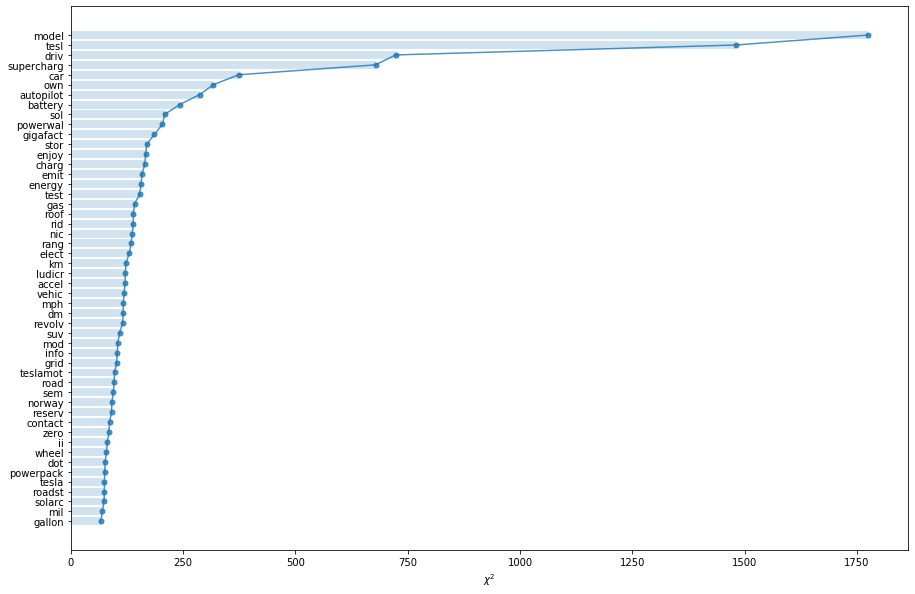

In [17]:
import matplotlib. pyplot as plt
plt.figure(figsize=(15,10))
wscores = zip(vertical_stack.columns, chi2score[0])
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-50:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

__Splitting data into Training and Testing Data__

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vertical_stack, y, test_size=0.20)

In [25]:
from collections import Counter
counter_train = Counter(y_train)
counter_test = Counter(y_test)


__Oversampling test data__

In [19]:
conda install -c glemaitre imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining conflict for spyder anaconda notebook nbconvert jupyter defusedxml: \| ^C
                                                                               failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [27]:
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [18]:
oversample = SMOTE()

In [65]:
X_new, y_new = oversample.fit_resample(X_train, y_train)

Feature Selection using results from Chi-square

In [4]:
X_new=pd.read_csv('X_train_oversampled.csv')

In [5]:
y_new=pd.read_csv('y_train_oversampled.csv')

In [6]:
X_test=pd.read_csv('X_test.csv')
y_test=pd.read_csv('y_test.csv')

In [28]:
X_select = X_new[vertical_stack.columns[np.argsort(chi2score[0])[::-1]][:1000]]

In [29]:
X_select.shape

(79400, 1000)

In [30]:
df=X_select.iloc[0]

In [31]:
print(df)

model         0.0
tesl          0.0
driv          0.0
supercharg    0.0
car           0.0
             ... 
quietest      0.0
certain       0.0
environm      0.0
goldeney      0.0
invert        0.0
Name: 0, Length: 1000, dtype: float64


In [32]:
vertical_stack.columns[np.argsort(chi2score[0])[::-1]][:1000]

Index(['model', 'tesl', 'driv', 'supercharg', 'car', 'own', 'autopilot',
       'battery', 'sol', 'powerwal',
       ...
       'aqg', 'livestream', 'basin', 'kms', 'deprecy', 'quietest', 'certain',
       'environm', 'goldeney', 'invert'],
      dtype='object', length=1000)

In [33]:
#Using oversampled data from drive

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


__Classification and prediction__

In [38]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=200
)
classifier.fit(X_select, y_new)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC, SVC
classifier2= BaggingClassifier(
base_estimator=LinearSVC(random_state=0, tol=1e-5),
n_estimators=50, random_state=0)


In [25]:
classifier3= BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3)
    ,n_estimators=200,max_samples=1.0,random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier4= BaggingClassifier(
    base_estimator=LogisticRegression()
    ,n_estimators=50,max_samples=1.0,random_state=0)

In [32]:
classifier5 = AdaBoostClassifier(
    LogisticRegression(),
    n_estimators=50,random_state=0
)

In [43]:
predictions = classifier.predict(X_test[vertical_stack.columns[np.argsort(chi2score[0])[::-1]][:1000]])

In [44]:
confusion_matrix(y_test, predictions)


array([[9612,  310],
       [ 205,  925]])

In [45]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='binary')

0.7822410147991543

__Extras__

In [ ]:
# X_new.to_csv('X_train_oversampled.csv', index = False, header=True)
# y_new.to_csv('y_train_oversampled.csv', index = False, header=True)
# X_test.to_csv('X_test.csv', index = False, header=True)
# y_test.to_csv('y_test.csv', index = False, header=True)

In [46]:
X_select.shape

(79400, 1000)

In [103]:
goal_dir = os.path.join(os.getcwd(), "tweets_of_teslafollowers/")

import os

tesla_followers = {}

for filename in os.listdir(goal_dir):
    if filename.endswith(".csv"): 
        file = pd.read_csv("tweets_of_teslafollowers/"+filename)
        file['clean_text']=file['text'].apply(clean_string)
        file['word list']=file['clean_text'].apply(remove_stop_words)
        file['cleaned_word_list']=file['word list'].apply(stem_and_lemmatize)
        
        del file['word list']

        vectorizer = TfidfVectorizer()
        try:
            tfidfmatrix = vectorizer.fit_transform(file['cleaned_word_list'])
            vocab = vectorizer.get_feature_names()
            tfidf_data=tfidfmatrix.toarray()
            tfidf_pd=pd.DataFrame(data=tfidf_data,columns=vocab,index=file['id'])
            tfidf_pd = tfidf_pd.drop(tfidf_pd.columns.difference(vertical_stack.columns[np.argsort(chi2score[0])[::-1]][:1000]),1)
            tesla_followers[filename] = tfidf_pd     
        except:
            print(file['cleaned_word_list'])

        

0    
Name: cleaned_word_list, dtype: object
0    
Name: cleaned_word_list, dtype: object
0    
1    
2    
3    
4    
5    
6    
Name: cleaned_word_list, dtype: object
0    
Name: cleaned_word_list, dtype: object
0    
Name: cleaned_word_list, dtype: object
0    
Name: cleaned_word_list, dtype: object
0    
1    
Name: cleaned_word_list, dtype: object
0    
Name: cleaned_word_list, dtype: object
0    
Name: cleaned_word_list, dtype: object
0    
1    
Name: cleaned_word_list, dtype: object
0    
Name: cleaned_word_list, dtype: object
0    
Name: cleaned_word_list, dtype: object
0    
1    
2    
3    
Name: cleaned_word_list, dtype: object
0    
Name: cleaned_word_list, dtype: object


In [104]:
#tesla_followers

In [105]:
for i in tesla_followers.values():
    print(i.shape)

(3, 4)
(2, 1)
(5, 6)
(17, 6)
(3, 6)
(631, 175)
(7, 5)
(87, 7)
(2, 2)
(116, 57)
(80, 60)
(1, 3)
(100, 15)
(4, 2)
(2, 0)
(24, 6)
(35, 15)
(3121, 209)
(3, 4)
(34, 26)
(3, 4)
(505, 161)
(39, 32)
(11, 14)
(4, 5)
(26, 23)
(19, 17)
(20, 5)
(62, 36)
(3, 0)
(198, 36)
(192, 61)
(184, 127)
(24, 30)
(43, 14)
(4, 0)
(8, 11)
(28, 6)
(1, 2)
(2, 2)
(987, 232)
(19, 27)
(77, 11)
(37, 4)
(22, 20)
(22, 18)
(46, 7)
(1, 2)
(2, 2)
(1, 0)
(166, 92)
(9, 4)
(2, 1)
(1, 1)
(21, 20)
(38, 21)
(1001, 73)
(23, 10)
(575, 51)
(38, 16)
(68, 57)
(189, 77)
(21, 15)
(1, 0)
(2, 5)
(6, 0)
(1, 1)
(61, 23)
(20, 2)
(18, 12)
(69, 22)
(6, 1)
(6, 3)
(4, 0)
(14, 5)
(135, 93)
(1, 0)
(6, 5)
(5, 7)
(7, 2)
(1, 1)
(5, 6)
(279, 59)
(1, 0)
(104, 0)
(944, 215)
(20, 8)
(25, 9)
(4, 3)
(1988, 217)
(5, 7)
(5, 2)
(2, 1)
(3, 3)
(1, 1)
(24, 20)
(531, 38)
(1, 2)
(6, 2)
(366, 198)
(1, 2)
(299, 111)
(1, 3)
(22, 10)
(349, 88)
(7, 5)
(1, 2)
(26, 16)
(5, 6)
(1498, 212)
(712, 218)
(2, 2)
(32, 12)
(1, 1)
(719, 115)
(147, 79)
(3241, 288)
(11, 7)
(31, 27)


## Evaluation 3- Ranking users

In [106]:
feature_list=list(vertical_stack.columns[np.argsort(chi2score[0])[::-1]][:1000])
print(len(feature_list))


1000


In [107]:
for key in tesla_followers:
    test=tesla_followers[key]

    toadd=list(set(feature_list)-set(test.columns))


    toadd_df=pd.DataFrame(np.zeros((test.shape[0], len(toadd))),columns=toadd)
    test.reset_index(drop=True, inplace=True)
    toadd_df.reset_index(drop=True, inplace=True)


    test=pd.concat([test,toadd_df],axis=1)
    
    tesla_followers[key]=test
    print(test.shape)
    
    
       

(3, 1000)
(2, 1000)
(5, 1000)
(17, 1000)
(3, 1000)
(631, 1000)
(7, 1000)
(87, 1000)
(2, 1000)
(116, 1000)
(80, 1000)
(1, 1000)
(100, 1000)
(4, 1000)
(2, 1000)
(24, 1000)
(35, 1000)
(3121, 1000)
(3, 1000)
(34, 1000)
(3, 1000)
(505, 1000)
(39, 1000)
(11, 1000)
(4, 1000)
(26, 1000)
(19, 1000)
(20, 1000)
(62, 1000)
(3, 1000)
(198, 1000)
(192, 1000)
(184, 1000)
(24, 1000)
(43, 1000)
(4, 1000)
(8, 1000)
(28, 1000)
(1, 1000)
(2, 1000)
(987, 1000)
(19, 1000)
(77, 1000)
(37, 1000)
(22, 1000)
(22, 1000)
(46, 1000)
(1, 1000)
(2, 1000)
(1, 1000)
(166, 1000)
(9, 1000)
(2, 1000)
(1, 1000)
(21, 1000)
(38, 1000)
(1001, 1000)
(23, 1000)
(575, 1000)
(38, 1000)
(68, 1000)
(189, 1000)
(21, 1000)
(1, 1000)
(2, 1000)
(6, 1000)
(1, 1000)
(61, 1000)
(20, 1000)
(18, 1000)
(69, 1000)
(6, 1000)
(6, 1000)
(4, 1000)
(14, 1000)
(135, 1000)
(1, 1000)
(6, 1000)
(5, 1000)
(7, 1000)
(1, 1000)
(5, 1000)
(279, 1000)
(1, 1000)
(104, 1000)
(944, 1000)
(20, 1000)
(25, 1000)
(4, 1000)
(1988, 1000)
(5, 1000)
(5, 1000)
(2, 100

In [113]:
tesla_tweet_prediction=[]
score={}
for key in tesla_followers:
    test=tesla_followers[key]
    current_user_pred=classifier.predict(test)
    tesla_tweet_prediction.append(current_user_pred)
    score[key]=sum(current_user_pred)/len(current_user_pred)

In [121]:
import collections
from collections import OrderedDict
from operator import itemgetter 
sorted_score = OrderedDict(sorted(score.items(), key=itemgetter(1),reverse=True))
#print(sorted_x)

In [123]:
a_file = open("rankedusers.csv", "w")
#a_dict = {"a": 1, "b": 2}
import csv

writer = csv.writer(a_file)
for key, value in sorted_score.items():
    writer.writerow([key, value])

a_file.close()

In [ ]:
file['clean_text']

In [ ]:
tfidf_pd.columns.difference(vertical_stack.columns[np.argsort(chi2score[0])[::-1]][:2500])
tfidf_pd.drop(tfidf_pd.columns.difference(vertical_stack.columns[np.argsort(chi2score[0])[::-1]][:2500]),1)